# Problem Statement

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products. Same is the case with each store.

The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers at BigMart to find out the properties of any product or store, which play a key role in increasing the overall sales.

# Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv("Train.csv")
test =pd.read_csv("Test.csv")
train_original=train.copy()
test_original=test.copy()


# Understanding the data

In [4]:
train.shape , test.shape

((8523, 12), (5681, 11))

train dataset has 8523 rows and 12 features and test has 5681 rows and 11 columns. train has 1 extra column which is the target variable. We will predict this target variable for the test dataset later in this project.

In [5]:
list(train.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [6]:
list(test.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Item_Outlet_Sales is present in train but not in test dataset because this is the target variable that we have to predict

In [7]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

 As we can see, there are 4 numeric and 7 categorical variables

In [8]:
# Combine train and test data.
test['Item_Outlet_Sales']=0
combined=train.append(pd.DataFrame(data=test),ignore_index=True)
combined.shape

(14204, 12)

# Univariate Analysis


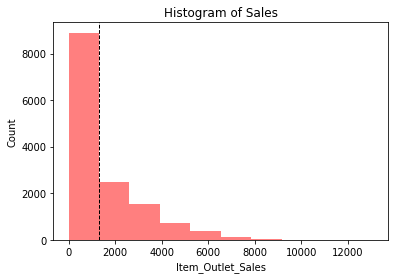

In [86]:
# Item_Outlet_Sales

combined['Item_Outlet_Sales'].plot.hist(color="R",alpha=0.5)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Count')
plt.title('Histogram of Sales')
plt.axvline(combined['Item_Outlet_Sales'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

As you can see, it is a right skewd variable and would need some data transformation to treat its skewness.

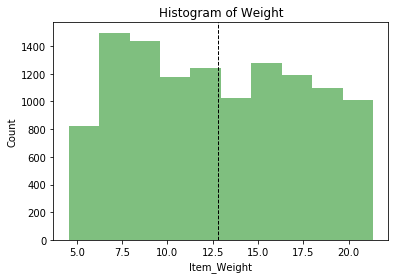

In [87]:
# Item_Weight

combined['Item_Weight'].plot.hist(color='G',alpha=0.5)
plt.xlabel('Item_Weight')
plt.ylabel('Count')
plt.title('Histogram of Weight')
plt.axvline(combined['Item_Weight'].mean(), color='black', linestyle='dashed', linewidth=1)
plt.show()

There seems to be no clear-cut pattern in Item_Weight.

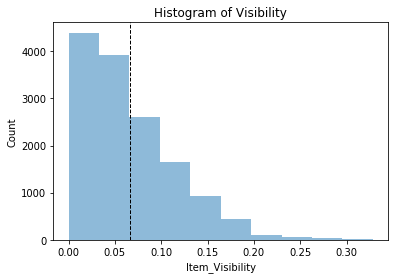

In [88]:
# Item_Visibility

combined['Item_Visibility'].plot.hist(alpha=0.5)
plt.xlabel('Item_Visibility')
plt.ylabel('Count')
plt.title('Histogram of Visibility')
plt.axvline(combined['Item_Visibility'].mean(),color='black',linestyle='dashed',linewidth=1)
plt.show()

Item_Visibility is right-skewed and should be transformed to curb its skewness

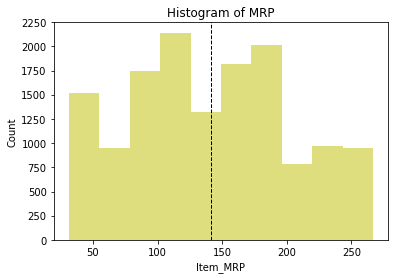

In [93]:
# Item_MRP

combined['Item_MRP'].plot.hist(color='Y',alpha=0.5)
plt.xlabel('Item_MRP')
plt.ylabel('Count')
plt.title('Histogram of MRP')
plt.axvline(combined['Item_MRP'].mean(),color='k',linestyle='dashed',linewidth=1)
plt.show()

There seems to be no clear-cut pattern in Item_Weight

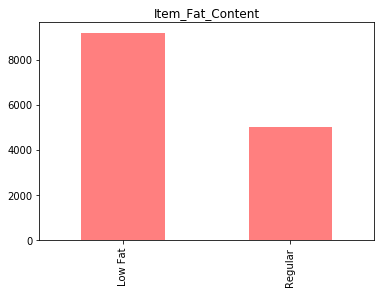

In [146]:
# Item_Fat_Content
combined['Item_Fat_Content'].replace(('LF','low fat'),'Low Fat',inplace=True)
combined['Item_Fat_Content'].replace('reg','Regular',inplace=True)
combined['Item_Fat_Content'].value_counts().plot.bar(title='Item_Fat_Content',color='R',alpha=0.5)
plt.show()

